In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
points_n = 200
clusters_n = 3
iteration_n = 100
seed = 123
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
points = np.random.uniform(0, 10, (points_n, 2))
centroids = tf.slice(tf.random.shuffle(points), [0, 0], [clusters_n, -1])

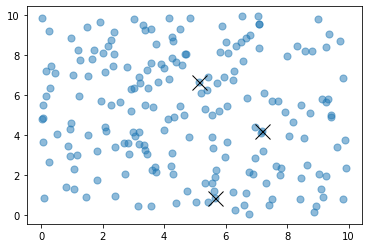

In [3]:
plt.scatter(points[:, 0], points[:, 1], s=50, alpha=0.5)
plt.plot(centroids[:, 0], centroids[:, 1], 'kx', markersize=15)
plt.show()

In [4]:
def closest_centroids(points, centroids):
    distances = tf.reduce_sum(tf.square(tf.subtract(points, centroids[:,None])), 2)
    assignments = tf.argmin(distances, 0)
    return assignments


In [5]:
def move_centroids(points, closest, centroids):
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])


In [6]:
for step in range(iteration_n):
    closest = closest_centroids(points, centroids)
    centroids = move_centroids(points, closest, centroids)


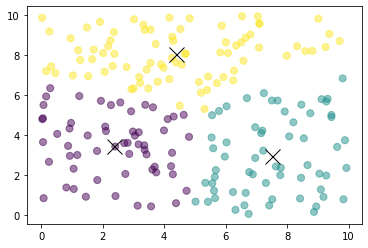

In [7]:
plt.scatter(points[:, 0], points[:, 1], c=closest, s=50, alpha=0.5)
plt.plot(centroids[:, 0], centroids[:, 1], 'kx', markersize=15)
plt.show()


In [8]:
def sse(points, centroids):
    sse1 = tf.reduce_sum(tf.square(tf.subtract(points, centroids[:,None])), 2).numpy()
    s = np.argmin(sse1, 0)
    distance = 0
    for i in range(len(points)):
      distance += sse1[s[i], i]

    return distance/len(points)

Text(0.5, 0, 'Number of clusters')

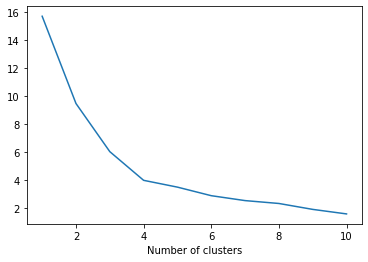

In [9]:
w_sse = []
for n in range(1, 11):
  centroids = tf.slice(tf.random.shuffle(points), [0, 0], [n, -1])
  for step in range(iteration_n):
    closest = closest_centroids(points, centroids)
    centroids = move_centroids(points, closest, centroids)
  #print(sse(points, centroids))
  w_sse.append(sse(points, centroids))
plt.plot(range(1, 11),w_sse) 
plt.xlabel('Number of clusters') 